# Welcome to House Price Prediction party

## GroupName: WeIsExpert
## GroupMember:

- CHAN Kai Kin
- CHEN Jian
- WU Kangzhang
- LEE Lip Tong

## Coder & Speaker: *WU Kangzhang*
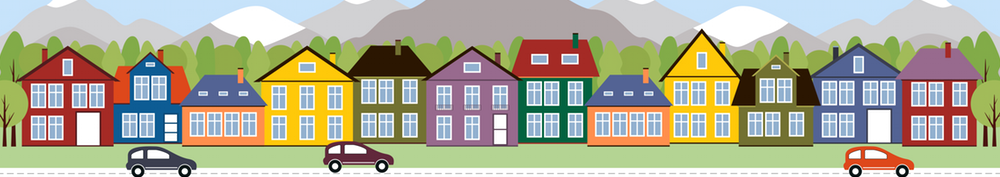
## Download the data from Kaggle [dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
### File descriptions
- train.csv - the training set
- test.csv - the test set

Here we have all the csv files and you can download by yourself.

Before reading the data, we import some neccessary python libraries.

------

In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output
import matplotlib.pyplot as plt
import seaborn as sns

Then we read the train.csv and test.csv files by using pandas.

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# the initial feature
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Features which have large porpotion of missing data can be dropped.

Before doing this, we have to figure out which feature has too many missing data.

We calculate the porportion of missing data and rank them into descengding ording.

In [6]:
#missing data in train dataset
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


It is visible to have a globol view on our dataset by using libray of `missingo`

You may should `pip install missingo` it before using it.

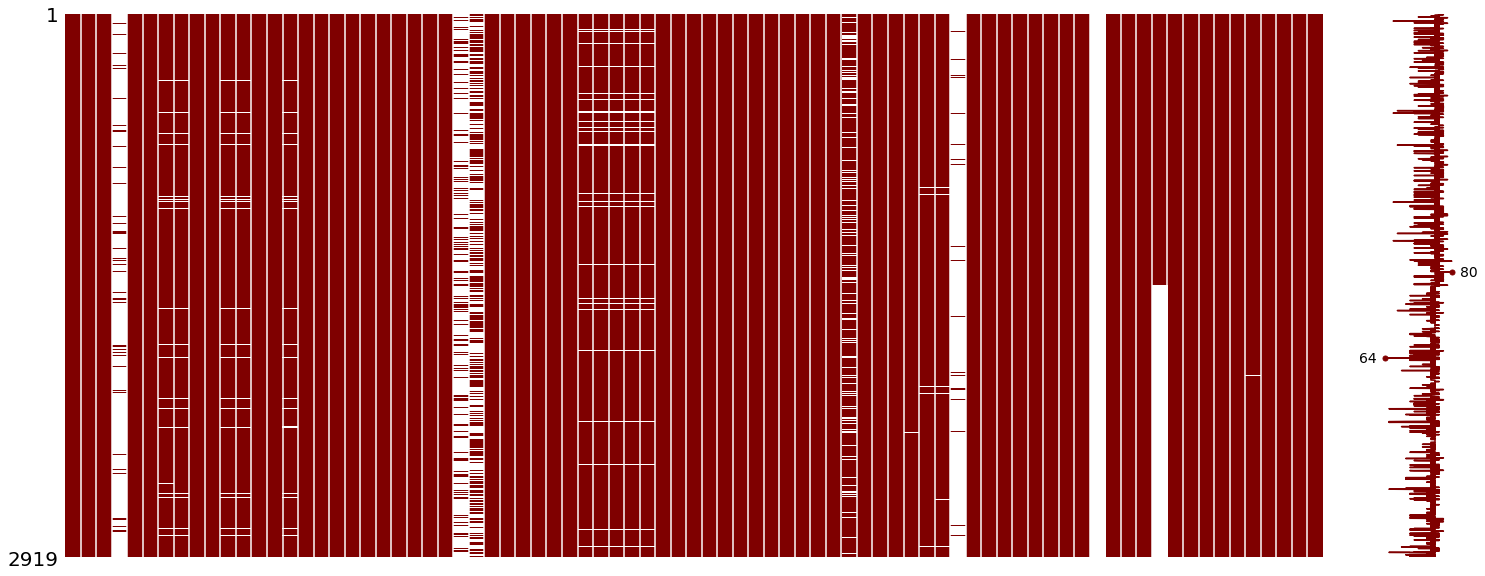

In [7]:
import missingno as msno
msno.matrix(df=pd.concat([train,test]), color=(0.5,0,0))

We want to drop the features which have more than 1 missing data. But we can see only have one missing date in the feature of `Electrical` ,so we just delete that one sample.

But for testing dataset,we just delete the same features as training dataset, but replace the missing data with its median.
Please notice that we are going to submit our prediction result to campare with other competitors on kaggle.

We also need to convert some features from `object:String` to `int:numpy.int64` by uisng `sklearn`.

We also keep ID information into other variables and then drop them.

In [8]:
#dealing with missing train data
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)

#filling missing test data with median
test = test.drop((missing_data[missing_data['Total'] > 1]).index,1)
test=test.fillna(test.median())

from sklearn.preprocessing import LabelEncoder
for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lb=LabelEncoder()
        lb.fit(list(train.iloc[:,i].values) + list(test.iloc[:,i].values))
        train.iloc[:,i]=lb.transform(list(train.iloc[:,i].values))
        test.iloc[:,i]=lb.transform(list(test.iloc[:,i].values))

# keep ID for submission
train_ID = train['Id']
test_ID = test['Id']
train=train.drop('Id',axis=1)
test=test.drop('Id',axis=1)

In [9]:
# We can see how many testing samples
len(test)

1459

How about look at the correlation heat map first? It is useful to give our a first impression of the importances of all features.

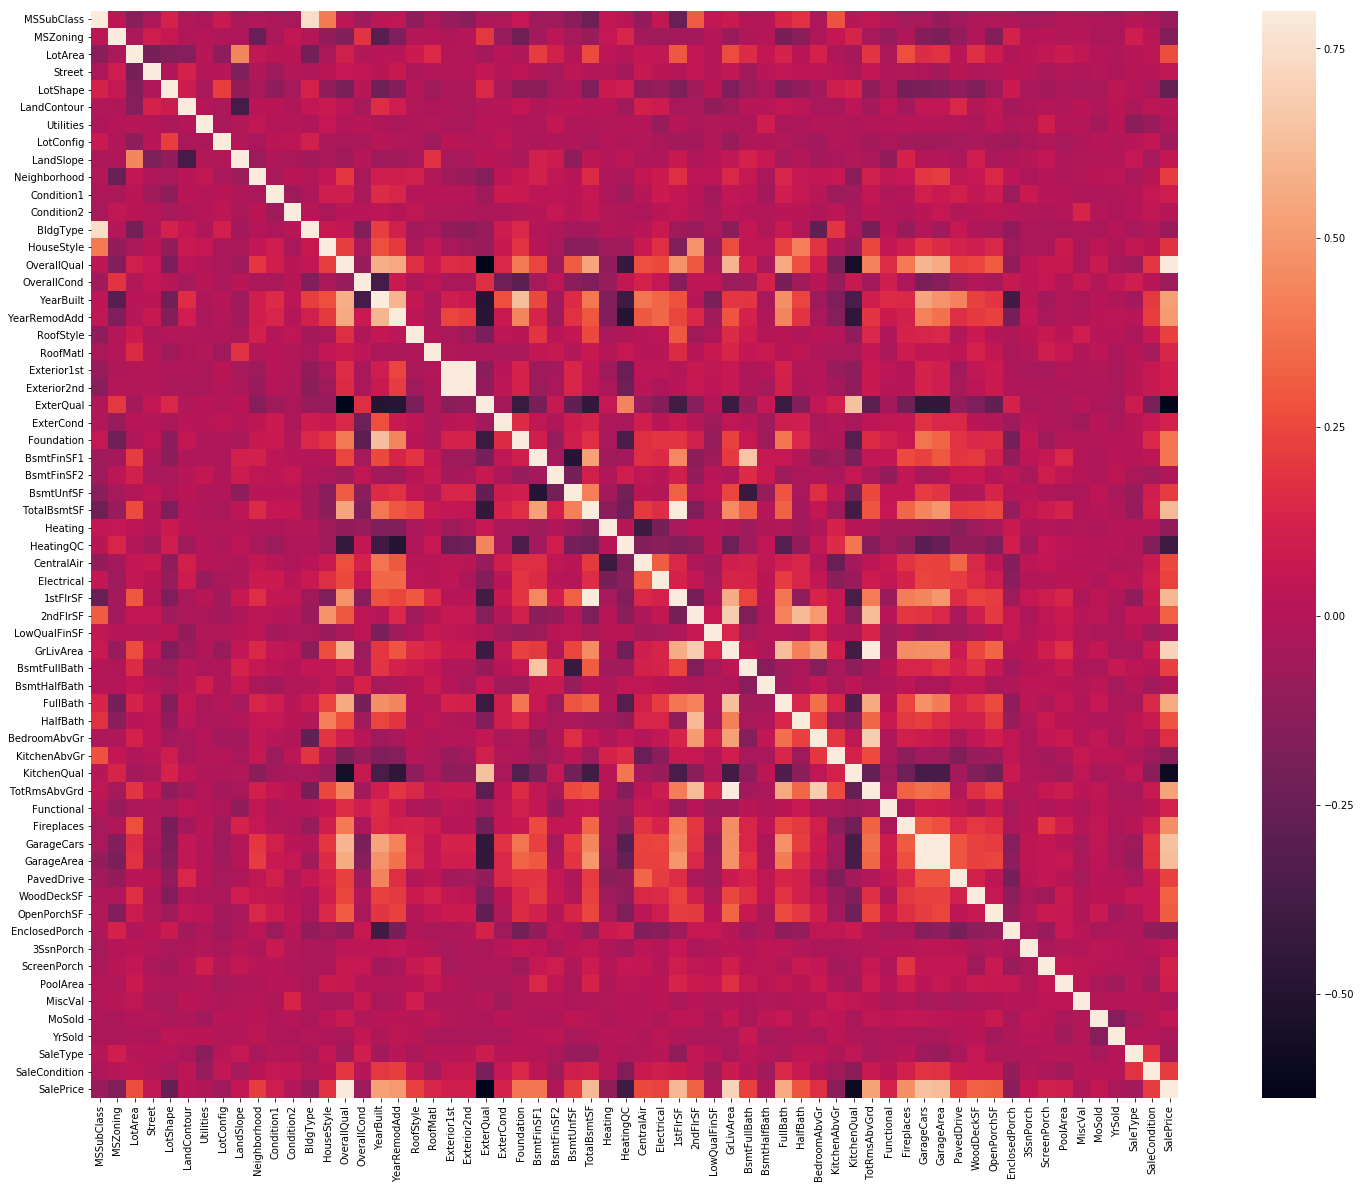

In [10]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corrmat,square=True,vmax=0.8)

Then we split the training data into `Y` and `X`, `Y` refers to our regression target variable, and `X` refers to the input of our regressor.

Then we can look at the global view of our dataset again to check the missing condition.

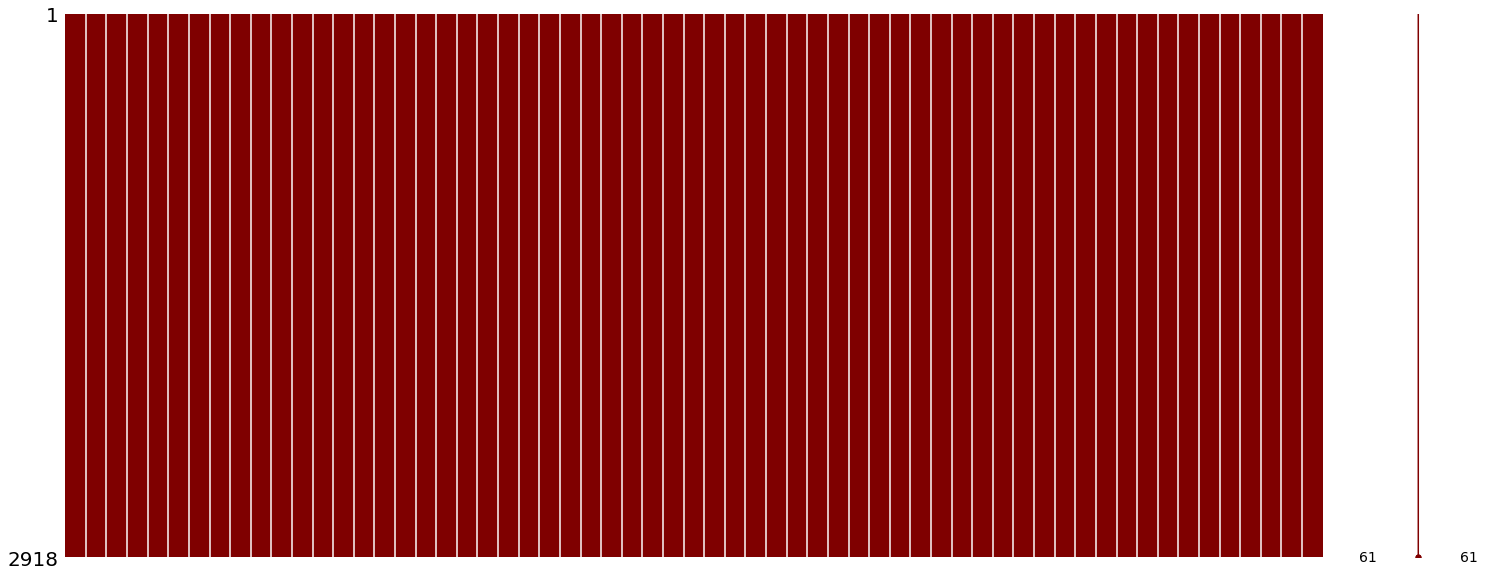

In [11]:
Y_train = train['SalePrice']
X_train = train.drop(['SalePrice'], axis=1)

#import missingno as msno
msno.matrix(df=pd.concat([X_train,test]), color=(0.5,0,0))

How about the number of features?

In [12]:
n_feature_dataset=len(X_train.columns)
n_feature_dataset

61

Then we start using **Random Forest** in sit-kit learn to do regression.

In [13]:
from sklearn.ensemble import RandomForestRegressor

Then we initialize a random forest regressor with our best parameters, with:

- The number of trees : 1000
- Criterion of measuring lose function : Mean Square Error
- The number of features to consider when looking for the best split : 40

In [14]:
regre=RandomForestRegressor(n_estimators=1000,criterion='mse',max_features=40,n_jobs=-1,oob_score=True,random_state=2)

In [15]:
regre.fit(X_train.values,Y_train.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=40, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=True, random_state=2,
           verbose=0, warm_start=False)

Using **the coefficient of variation with Root-mean-square deviation (cv_RMSD)** to measure our regressor.

In [16]:
def cv_rmsd(y,y_pred):
    y=y.values
    return np.sqrt(((y_pred-y)**2).sum()/len(y))/y.mean()

In [17]:
Y_train_pred=regre.predict(X_train.values)
cv_rmsd(Y_train,Y_train_pred)

0.0557721792298317

In order to visulize our random forest regressor, campare it to linear regressor and logistic regressor,let's choose the feature with highest correlation with sale price,refer to heat map,that is `OverallQual` and `YearBuilt`.

We need to train another random forest regressor.

In [18]:
regre0=RandomForestRegressor(n_estimators=100,criterion='mae',n_jobs=-1,oob_score=True)
regre0.fit(X_train['OverallQual'].values.reshape(-1,1),Y_train.values)
regre1=RandomForestRegressor(n_estimators=100,criterion='mae',n_jobs=-1,oob_score=True)
regre1.fit(X_train['YearBuilt'].values.reshape(-1,1),Y_train.values)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [19]:
y_pred_byOverallQual=regre0.predict(X_train['OverallQual'].values.reshape(-1,1))
print('The CV_RMSD of regression with OverallQual:%s'% cv_rmsd(Y_train,y_pred_byOverallQual))
y_pred_byYearBuilt=regre1.predict(X_train['YearBuilt'].values.reshape(-1,1))
print('The CV_RMSD of regression with YearBuilt:%s'% cv_rmsd(Y_train,y_pred_byYearBuilt))

The CV_RMSD of regression with OverallQual:0.24849918862939988
The CV_RMSD of regression with YearBuilt:0.3389899493856033


To make it visiable:

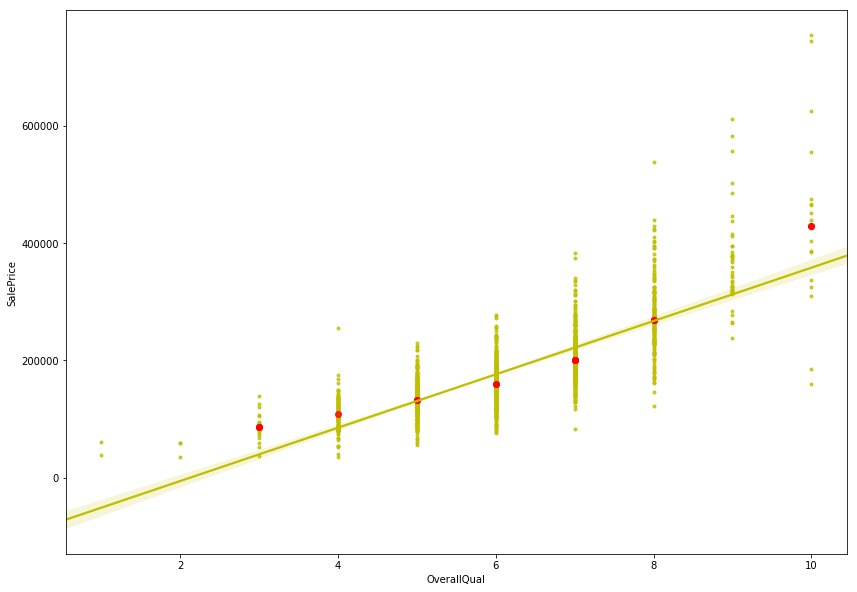

In [20]:
fig=plt.figure(figsize=(14,10))
sns.regplot(x=X_train['OverallQual'], y=Y_train,marker='.',color='y')
x=np.random.randint(low=0,high=11,size=20).reshape(-1,1)
y=regre0.predict(x)
sns.regplot(x=x,y=y,fit_reg=False,color='r')

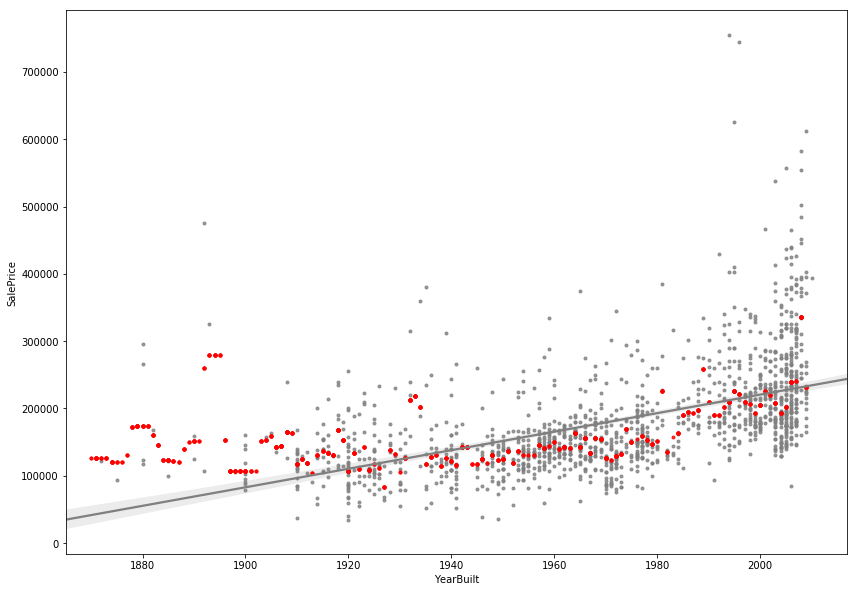

In [21]:
fig=plt.figure(figsize=(14,10))
sns.regplot(x=X_train['YearBuilt'], y=Y_train,color='grey',marker='.')
x=np.random.randint(low=1870,high=2010,size=1000).reshape(-1,1)
y=regre1.predict(x)
sns.regplot(x=x,y=y,fit_reg=False,color='r',marker='.')

### Then we can predict the sale price in testing samples.

In [22]:
Y_test_pred=regre.predict(test.values)

### Finally we write it into a csv file and submit it to kaggle to check our result

In [23]:
def output(filename):
    fw=open(filename,'w')
    fw.write('Id,SalePrice\n\n')
    for i in range(len(test_ID)):
        fw.write(str(test_ID.values[i])+','+str(Y_test_pred[i])+'\n')
    fw.close()

In [24]:
#output('submission.csv')